In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from pathlib import Path
from sklearn import datasets, metrics, model_selection, svm
%matplotlib inline

[[0. 0.]
 [0. 0.]]
221      Mild
223      Mild
224      Mild
225      Mild
228      Mild
229    Severe
230      Mild
231      Mild
232      Mild
233    Severe
234    Severe
235      Mild
236      Mild
237      Mild
238    Severe
239      Mild
240    Severe
242    Severe
243    Severe
245      Mild
246      Mild
247    Severe
248      Mild
253      Mild
255    Severe
256    Severe
257      Mild
258      Mild
260      Mild
264      Mild
265      Mild
266      Mild
267    Severe
269    Severe
270      Mild
271    Severe
272      Mild
273      Mild
274      Mild
Name: Ambul, dtype: object
221    0
223    0
224    0
225    0
228    0
Name: Ambul, dtype: int64
Index(['Mild', 'Severe'], dtype='object')
[[0.8030303  0.67307692 0.27394107 ... 0.5859797  0.24533083 0.63069834]
 [0.18181818 0.         0.         ... 0.88848696 0.66075118 0.26582667]
 [0.45454545 0.05769231 0.         ... 0.31964237 0.09683651 0.05017089]
 ...
 [0.53030303 0.46153846 0.30248619 ... 0.63675089 0.11947918 0.34621969

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

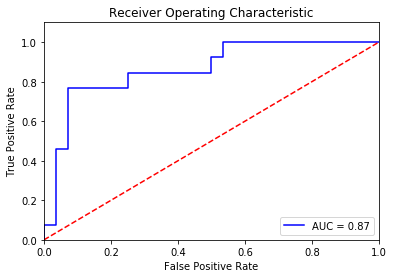

0.8653846153846154


In [9]:
data = pd.read_csv(r"C:\Users\sshin\Desktop\SYSHIN0228\RERC_STARTS_Sensor_Analysis\Machine_Learning_6MWT\Feature_Matrix_Prediction_6MWT_BBS.csv", sep=',')
data = data.dropna()

CM = np.zeros((2,2))
print(CM)

for n in [60]:
    data_filter = data.query('cut_off_time == @n')
#     print(data_filter)
    
    X = data_filter[[
        'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
        'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
        'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
        'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm',
        'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP', 'spectral_centroid_AP', 'spectral_centroid_ML',
        'max_accAP', 'max_accML', 'mean_accAP', 'mean_accAP', 'rms_AP', 'rms_ML', 'jerk_AP', 'jerk_ML',
        'mean_velAP', 'mean_velML', 'length_swayAPAcc', 'length_swayMLAcc',
        'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
        'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
        'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
        'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
        'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
        'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
        'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
        'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
        'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
        'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
        'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
        'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
        'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
        'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
                ]].values
    
#     X = data_filter[[
#         'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
#         'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
#         'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#         'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm',
#         'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#         'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#         'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#         'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#         'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#         'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#         'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
#         'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#         'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#         'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#         'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#         'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#         'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#         'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#                 ]].values
    
    
    
#     y = data_filter['Ambul'].values.reshape(-1,1)


    # To combine Moderate and Severe
    k = 0
    for i in data_filter['Ambul']:
        if i == 'Moderate':
            data_filter['Ambul'].values[k] = 'Severe'
        k+=1
            
    print(data_filter['Ambul'])

    factor = pd.factorize(data_filter['Ambul'])
    data_filter.Ambul = factor[0]
    definitions = factor[1]
    print(data_filter.Ambul.head())
    print(definitions)
    

    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    y = data_filter['Ambul'].values


    print(X_scale)
    print(y)
    
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    i = 0

    y_test_ = np.zeros((41))
    y_pred_ = np.zeros((41))
    y_probs_ = np.zeros((41,2))
    
    correct = 0
    incorrect = 0
    for train_index, test_index in loo.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_scale[train_index], X_scale[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = LogisticRegression(random_state=0).fit(X_train,y_train)        
        
        y_pred = clf.predict(X_test)
        
        y_test_[i] = y_test
        y_pred_[i] = y_pred
        y_probs_[i] = clf.predict_proba(X_test)
                
        reversefactor = dict(zip(range(2),definitions))
        y_test = np.vectorize(reversefactor.get)(y_test)
        y_pred = np.vectorize(reversefactor.get)(y_pred)    


#         print(y_pred)
#         df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})       
#         confusion = pd.crosstab(y_pred,y_test,colnames=['Actual'], rownames=['Predicted'])
#         print(confusion)
#         print(confusion_matrix(y_test, y_pred))

#         print(df)

        print(y_pred)
        print(y_test)

        if y_test == ['Mild'] and y_pred == ['Mild']:
            CM[0][0] += 1
        elif y_test == ['Mild'] and y_pred == ['Severe']:
            CM[0][1] += 1
        elif y_test == ['Severe'] and y_pred == ['Severe']:
            CM[1][1] += 1
        elif y_test == ['Severe'] and y_pred == ['Mild']:
            CM[1][0] += 1
            
        print(CM)
        

        if y_test == y_pred:
            correct = correct + 1
        else:
            incorrect = incorrect + 1

        i = i+1
        print("Iteration:", i)  

    print("Correct: ", correct)
    print("Incorrect: ", incorrect)
    
target_names = ['Mild', 'Severe']    
print(confusion_matrix(y_test_,y_pred_))
print(classification_report(y_test_,y_pred_, target_names = target_names))

fpr, tpr, threshold = metrics.roc_curve(y_test_, y_probs_[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc)

In [7]:

print(y_test_)
print(y_pred_)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
